In [9]:
import pandas as pd
import random

# main40 = pd.read_excel("ref/wordlist.xlsx")
# main100 = pd.read_excel("ref/fullwordlist.xlsx")

mainold = pd.read_excel("ref/wordlist_dict.xlsx")
mainnew = pd.read_excel("ref/newwordlist_dict.xlsx")

In [ ]:
# illegal = [2,4,5,25,29,43,47,49,65,67,69,74,77,85,90,91,92,99,100]
# badimage = [15,27,30,89,94,93,78]

# removal = main100

# removal = removal[~removal['imgid'].isin(main40["imgid"].tolist())]
# removal = removal[~removal['imgid'].isin(illegal)]

In [10]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import random

# Load the full dataset from fullwordlist.xlsx (must be in the same directory)
def sample_filtered_df(fullwordlist, seed, sample_size=20):
    
    filtered_df = fullwordlist[
        fullwordlist['th'].str.len().between(3, 7) &
        fullwordlist['en'].str.len().between(3, 7)
    ]

    sampled_df = filtered_df.sample(n=min(sample_size, len(filtered_df)), random_state=seed)
    
    return sampled_df

def histochecker(df, mode):
    """
    Either plots histograms or performs Chi-Square goodness-of-fit tests on word length distributions.

    Parameters:
    - df (pd.DataFrame): The sampled dataframe with 'th' and 'en' columns.
    - mode (str): Either "plotter" (for visualizing histograms) or "variant" (for statistical analysis).

    Returns:
    - If mode == "variant":
        - p_value_awo (float): Chi-Square p-value for Thai word length distribution.
        - p_value_awa (float): Chi-Square p-value for English word length distribution.
    """

    # Extract word lengths
    awo = [len(word) for word in df['th']]
    awa = [len(word) for word in df['en']]

    if mode == "plotter":
        # Generate histograms of word lengths
        fig, axs = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
        axs[0].hist(awo, bins=np.arange(2.5, 8.5, 1), color="orange", edgecolor="black")
        axs[0].set_title("Thai")
        axs[1].hist(awa, bins=np.arange(2.5, 8.5, 1), color="blue", edgecolor="black")
        axs[1].set_title("English")
        plt.show()

    elif mode == "variant":
        # Define bin ranges for lengths 3-7
        num_bins = 5  
        bins = np.arange(2.5, 8.5, 1)  

        # Compute Chi-Square for Thai word lengths
        observed_awo, _ = np.histogram(awo, bins=bins)
        expected_awo = np.full(num_bins, len(awo) / num_bins)
        chi2_stat_awo, p_value_awo = stats.chisquare(observed_awo, expected_awo)

        # Compute Chi-Square for English word lengths
        observed_awa, _ = np.histogram(awa, bins=bins)
        expected_awa = np.full(num_bins, len(awa) / num_bins)
        chi2_stat_awa, p_value_awa = stats.chisquare(observed_awa, expected_awa)

        return p_value_awo, p_value_awa  # Return both p-values


In [3]:
# Loop to find the highest sum of Chi-Square p-values
# highest_sum = 1.1648  # Stores the highest sum found so far
# best_seed = 2247  # Stores the seed that gave the highest sum

# for i in range(1000):  # Run the experiment 1000 times
#     seed = random.randint(0, 1000000000)  # Generate a random seed
# 
#     sampled_df = sample_filtered_df(removal, seed)  # Filter and sample 60 rows
#     p_value_awo, p_value_awa = histochecker(sampled_df, "variant")  # Get Chi-Square p-values
#     
#     p_sum = p_value_awo + p_value_awa  # Sum the two p-values
#     
#     if p_sum > highest_sum:  # If this is the highest sum so far, update records
#         highest_sum = p_sum
#         best_seed = seed
#         print(f"New highest sum found: {highest_sum:.4f} (Seed: {best_seed})")
#         print(f"  P-value (Thai): {p_value_awo:.4f}, P-value (English): {p_value_awa:.4f}")

# print(f"Final highest sum after n iterations: {highest_sum:.4f} (Seed: {best_seed})")

In [ ]:
# sampled_df = sample_filtered_df(removal, 2247)
# histochecker(sampled_df,"plotter")
# sampled_df.to_excel("ref/20 NEW sample word.xlsx", index=None)
# comb = pd.concat([main40, sampled_df],ignore_index=True)
# histochecker(comb, "plotter")
# comb.to_excel("ref/60 old + new word.xlsx", index=None)

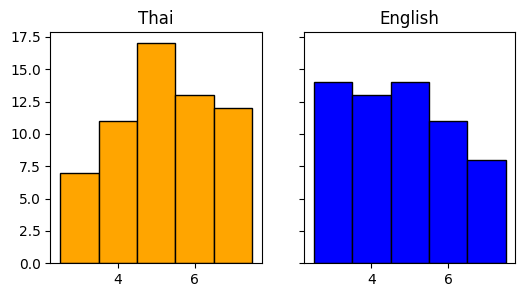

In [11]:
comb = pd.concat([mainold, mainnew], ignore_index=True)
histochecker(comb, "plotter")

In [6]:
# create order list

# wordid is predefined
wordid = comb['imgid'].tolist()

# define lang 1 = th, 2 = en
lang = [1,2]

# image id, 0 = incorrect, 1 = correct
truestate = [0,1]


imgorderth = pd.DataFrame([[1, n, p]  for n in wordid for p in truestate], columns = ["lang", "wordid", "truestate"])
imgorderen = pd.DataFrame([[2, n, p]  for n in wordid for p in truestate], columns = ["lang", "wordid", "truestate"])


In [7]:
# add word and img dir,  word[lang][id][type] and img[state][id]
def word_n_imgdir_rmaker(df):
    for rowid in range(0, len(df.index)):
        wordid = df.loc[rowid, "wordid"]
        if df.loc[rowid,"lang"] == 1:
            df.loc[rowid,"worddir"] = f"word/wordth{wordid:03}1.png"
        else:
            df.loc[rowid,"worddir"] = f"word/worden{wordid:03}1.png"

    for rowid in range(0, len(df.index)):
        wordid = df.loc[rowid, "wordid"]
        if df.loc[rowid, "truestate"] == 0:
            df.loc[rowid,"imgdir"] = f"image/False/imgf{wordid:02}.png"
        else:
            df.loc[rowid, "imgdir"] = f"image/True/img{wordid:02}.png"


word_n_imgdir_rmaker(imgorderth)
word_n_imgdir_rmaker(imgorderen)

In [8]:
# export the file for running only
# start with en dataframe --> repeat --> randomize --> export
import random
random.seed(69) # to control every repeat

def con_n_ran(df, name):
    rep = pd.concat([df, df], ignore_index=True)
    full = rep.sample(frac=1)
    full.to_excel(name, index=None)

con_n_ran(imgorderen, "imgorder_en.xlsx")
con_n_ran(imgorderth, "imgorder_th.xlsx")

# # if merge both of them, need to write a new one
# rep = pd.concat([imgorderth, imgorderen], ignore_index=True)
# 
# # and repeat one more time
# reprep = pd.concat([rep, rep], ignore_index=True)
# repsam = reprep.sample(frac=1)
# 
# repsam.to_excel("fullwordorder.xlsx", index=None)